In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9, 5)

In [2]:
%matplotlib inline

### 数据

$X$ 为随机数据，经仿射变换后为 $Y$，

$$
Y = \mathbf{A} X + C
$$

In [3]:
rng = np.random.RandomState(1)
A = rng.rand(2, 2)
X = rng.randn(800, 2)
Y = A.dot(X.T).T + np.array([2.0, 3.0])
X.shape, Y.shape

((800, 2), (800, 2))

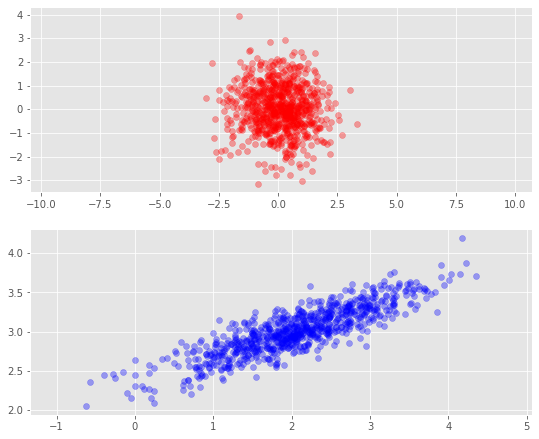

In [5]:
plt.figure(figsize=(9, 7.5))
plt.subplot(211)
plt.scatter(X[:, 0], X[:, 1], alpha=0.35, c='r')
plt.axis('equal');

plt.subplot(212)
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.35, c='b')
plt.axis('equal');

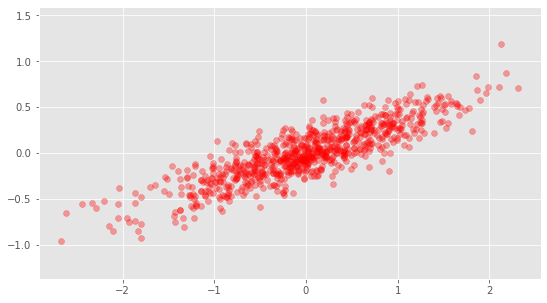

In [6]:
# 零中心化
plt.figure(figsize=(9, 5))

Y -= np.mean(Y, axis=0)
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.35, c='r')
plt.axis('equal');

### 标准化

每个特征列分别计算，

$$
Y_{i} = \dfrac{Y_{i}-mean}{std}
$$

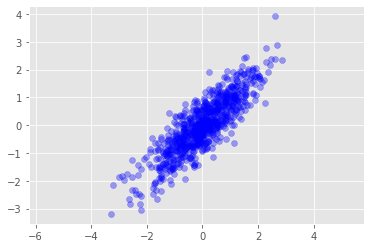

In [7]:
# 标准化
Y /= np.std(Y, axis=0)
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.35, c='b')
plt.axis('equal');

### 去相关性

- 相关系数

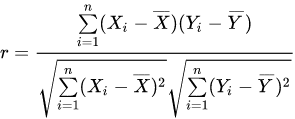

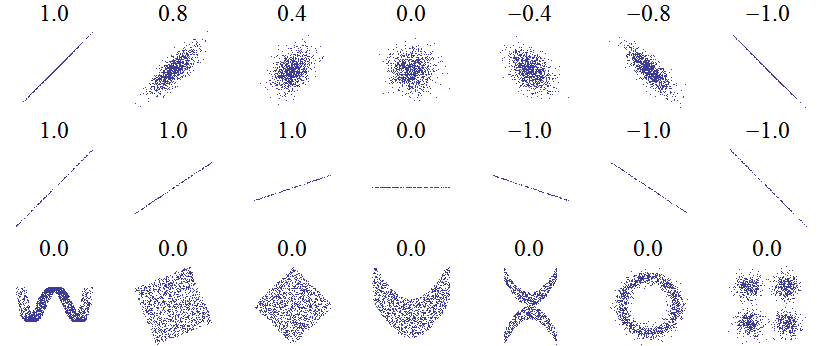

In [15]:
# 1、零中心化
Y -= np.mean(Y, axis=0)

# 2、计算协方差矩阵
CoV = np.dot(Y.T, Y) / Y.shape[0]

# 3、对协方差矩阵进行奇异值分解 SVD
U, S, V = np.linalg.svd(CoV)

In [16]:
U.shape, V.shape

((2, 2), (2, 2))

查看 U 和 V 是否一致

In [17]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [18]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

可以将 U 的两列理解成数据的主方向。

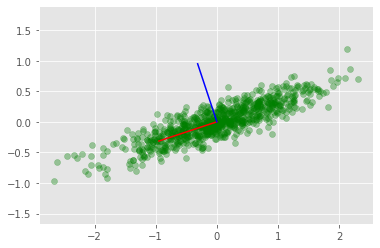

In [29]:
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.35, c='g')

# 画出主方向
plt.plot([0,U[0,0]], [0,U[1,0]], c='r')
#plt.quiver([0],[0],[0,U[0,0]], [0,U[1,0]], angles="uv", color="#ff5511",width=0.005, scale=6)
plt.plot([0,U[0,1]], [0,U[1,1]], c='b')
#plt.quiver([0],[0],[0,U[0,1]], [0,U[1,1]], angles="uv", color="#1155ff",width=0.005, scale=12)
plt.axis('equal');

In [21]:
# 将已经零中心化的数据 Y 投影到 U 得到新坐标，即去除了相关性
Y_rot = np.dot(Y, U)

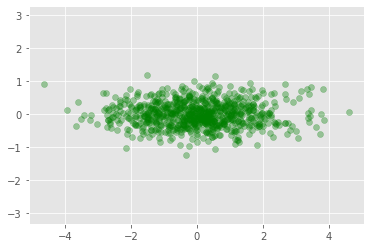

In [22]:
plt.scatter(Y_rot[:, 0], Y_rot[:, 1], alpha=0.35, c='g')
plt.axis('equal');

### 白化

In [23]:
rng = np.random.RandomState(1)
A = rng.rand(2, 2)
X = rng.randn(800, 2)
Y = A.dot(X.T).T + np.array([2.0, 3.0])

In [24]:
# 1、零中心化
Y -= np.mean(Y, axis=0)

# 2、计算协方差矩阵
CoV = np.dot(Y.T, Y) / Y.shape[0]

# 3、对协方差矩阵进行奇异值分解SVD
U, S, V = np.linalg.svd(CoV)

In [25]:
# 将已经零中心化的数据 Y 投影到 U 得到新坐标，即去除了相关性
Y_rot = np.dot(Y, U)

In [26]:
# 统一各个轴上的尺度
Y_white = Y_rot / np.sqrt(S + 1e-5)

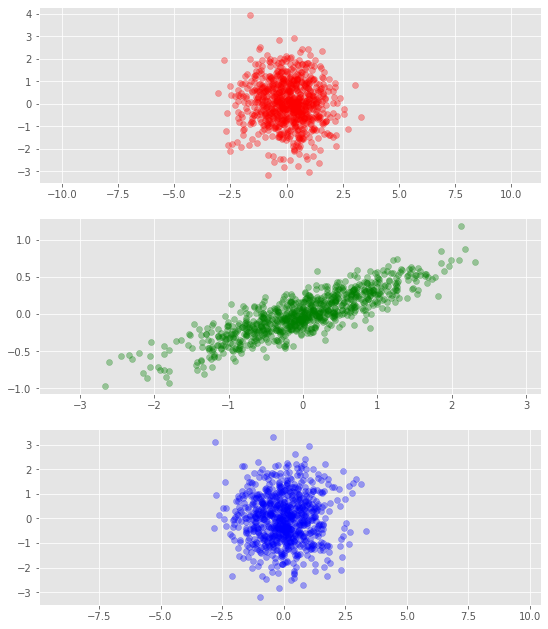

In [27]:
plt.figure(figsize=(9, 11))

# 原始数据
plt.subplot(311)
plt.scatter(X[:, 0], X[:, 1], alpha=0.35, c='r')
plt.axis('equal');

# 数据被变换后经零中心化
plt.subplot(312)
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.35, c='g')
plt.axis('equal');

# 数据被变换后再经白化后的结果
plt.subplot(313)
plt.scatter(Y_white[:, 0], Y_white[:, 1], alpha=0.35, c='b')
plt.axis('equal');